Sources: https://www.youtube.com/channel/UCZPFjMe1uRSirmSpznqvJfQ

In [30]:
import tensorflow as tf
import json
import numpy as np
from sklearn.model_selection import train_test_split
#import tensorflow.keras as keras
import matplotlib.pyplot as plt
import pydot
#from keras.utils.vis_utils import plot_model

In [59]:
data_path = "data.json"

In [60]:
def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data =json.load(fp)
        
    # want to convert lists into numpy arrays
    inputs = np.asarray(data["mfcc"])
    targets = np.asarray(data["labels"])
    
    return inputs, targets
    
    

In [70]:
if __name__ == "__main__":
    #loading the data
    inputs, targets = load_data(data_path)
    
    #splitting data into train and test sets. The 0.3 means 30% used for test set.
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, 
                                                                              targets, 
                                                                              test_size = 0.3)
    #building the model
    #multilayer perceptron
    model = keras.Sequential([
        #input layer
        #flatten takes a multidimensional array and "flattens" it out
      
        keras.layers.Flatten(),
        
        #first hidden layer, 512 neurons
        keras.layers.Dense(512, activation="relu"),
        #2nd hidden layer 
        keras.layers.Dense(256, activation="relu"),
        
        #keras.layers.Dense(256, activation="relu"),
        
        # 3rd hidden layer
        keras.layers.Dense(64, activation="relu"),
        #output layer, 7 neurons for 7 emotional categories
        keras.layers.Dense(14, activation="softmax"),
    ])
    # now we want to compile the network
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    #model.summary()
    
    #training the network
    #using mini-batch basically, taking samples from the dataset (usually of 16-128 in size)
    history = model.fit(inputs_train, targets_train, 
              validation_data=(inputs_test, targets_test),
              epochs=100,
              batch_size=25)
      # evaluating the netowrk on the next set
    test_error, test_accuracy = model.evaluate(inputs_test, targets_test, verbose=1)
    print("Accuracy on the test set is: {}".format(test_accuracy))


Train on 1960 samples, validate on 840 samples
Epoch 1/100
1960/1960 [==============================] - 1s 391us/sample - loss: 22.5763 - accuracy: 0.2724 - val_loss: 6.3404 - val_accuracy: 0.5167
Epoch 2/100
1960/1960 [==============================] - 0s 143us/sample - loss: 4.1462 - accuracy: 0.6148 - val_loss: 3.8372 - val_accuracy: 0.6560
Epoch 3/100
1960/1960 [==============================] - 0s 153us/sample - loss: 2.0316 - accuracy: 0.7556 - val_loss: 2.7659 - val_accuracy: 0.7250
Epoch 4/100
1960/1960 [==============================] - 0s 157us/sample - loss: 1.2837 - accuracy: 0.8168 - val_loss: 2.3299 - val_accuracy: 0.7524
Epoch 5/100
1960/1960 [==============================] - 0s 155us/sample - loss: 0.8399 - accuracy: 0.8679 - val_loss: 1.6846 - val_accuracy: 0.7845
Epoch 6/100
1960/1960 [==============================] - 0s 158us/sample - loss: 0.5111 - accuracy: 0.9087 - val_loss: 1.8693 - val_accuracy: 0.7929
Epoch 7/100
1960/1960 [==============================] - 0

Epoch 55/100
1960/1960 [==============================] - 0s 211us/sample - loss: 8.6151e-06 - accuracy: 1.0000 - val_loss: 0.9701 - val_accuracy: 0.9012
Epoch 56/100
1960/1960 [==============================] - 0s 211us/sample - loss: 8.3737e-06 - accuracy: 1.0000 - val_loss: 0.9701 - val_accuracy: 0.9012
Epoch 57/100
1960/1960 [==============================] - 0s 219us/sample - loss: 8.1444e-06 - accuracy: 1.0000 - val_loss: 0.9696 - val_accuracy: 0.9012
Epoch 58/100
1960/1960 [==============================] - 0s 200us/sample - loss: 7.9170e-06 - accuracy: 1.0000 - val_loss: 0.9690 - val_accuracy: 0.9012
Epoch 59/100
1960/1960 [==============================] - 0s 210us/sample - loss: 7.6831e-06 - accuracy: 1.0000 - val_loss: 0.9687 - val_accuracy: 0.9012
Epoch 60/100
1960/1960 [==============================] - 0s 215us/sample - loss: 7.4732e-06 - accuracy: 1.0000 - val_loss: 0.9686 - val_accuracy: 0.9012
Epoch 61/100
1960/1960 [==============================] - 0s 216us/sample - 

In [58]:
print(inputs_train.shape)
print(inputs_test.shape)
print(inputs.shape)



(1960, 44, 13)
(840, 44, 13)
(2800, 44, 13)


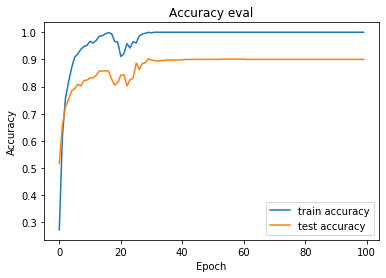

In [77]:
fig, axs = plt.subplots()

    # create accuracy subplots
axs.plot(history.history["accuracy"], label="train accuracy")
axs.plot(history.history["val_accuracy"], label="test accuracy")
axs.set_ylabel("Accuracy")
axs.set_xlabel("Epoch")
axs.legend(loc="lower right")
axs.set_title("Accuracy eval")
plt.show()

In [53]:
# this will predict individual points 
def predict(model, x, y):
    x = x[np.newaxis, ...]
    
    # the prediction is 2d
    preds = model.predict(x) # expects a 4d array but X is originally 3d
    
    # want to extract the index of X with the max favlue
    pred_index = np.argmax(preds, axis = 1 ) # 
    print("Expected index of the output: {}, Predicted index: {}".format(y, pred_index))

In [73]:
# testing the model with noisy data 
# first import the new data 
data_path2 = "data-light-noise.json"
X, y = load_data(data_path2)
X = X[...,np.newaxis]

In [82]:
test_error_noise, test_accuracy_noise= model.evaluate(X, y, verbose=1)
print("Accuracy on the Light Noise set is: {}".format(test_accuracy_noise))

2800/2800 [==============================] - 0s 146us/sample - loss: 1.2539 - accuracy: 0.8429
Accuracy on the Light Noise set is: 0.8428571224212646


In [75]:
data_path3 = "data-heavy-noise.json"
X2, y2 = load_data(data_path3)
X2 = X2[...,np.newaxis]

In [76]:
test_error_heavy, test_accuracy_heavy= model.evaluate(X2, y2, verbose=1)
print("Accuracy on the Heavy Noise set is: {}".format(test_accuracy_heavy))

2800/2800 [==============================] - 0s 60us/sample - loss: 3.9382 - accuracy: 0.4757
Accuracy on the Heavy Noise set is: 0.4757142961025238
